In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn import tree,metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
data  = pd.read_csv(r"C:\Users\91863\Downloads\Company_Data.csv")
data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.shape

(400, 11)

In [4]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data = pd.get_dummies(data,columns =["Urban","US"])

In [7]:

data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [8]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.554458,-0.231815,-0.051955,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.038549,-0.100239,0.025197,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0.053465,-0.004670,-0.056855,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.056552,-0.004557,-0.033594,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0.020614,-0.042663,-0.106378,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.050924,-0.102177,0.011747,-0.047016,0.047016,-0.057861,0.057861
ShelveLoc,-0.554458,-0.038549,0.053465,-0.056552,0.020614,-0.050924,1.000000,-0.014149,0.025723,-0.075404,0.075404,0.047378,-0.047378
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,-0.014149,1.000000,0.006488,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.025723,0.006488,1.000000,0.033094,-0.033094,0.078250,-0.078250
Urban_No,0.015419,-0.066594,-0.037967,-0.042035,0.052025,-0.047016,-0.075404,-0.028479,0.033094,1.000000,-1.000000,0.047085,-0.047085


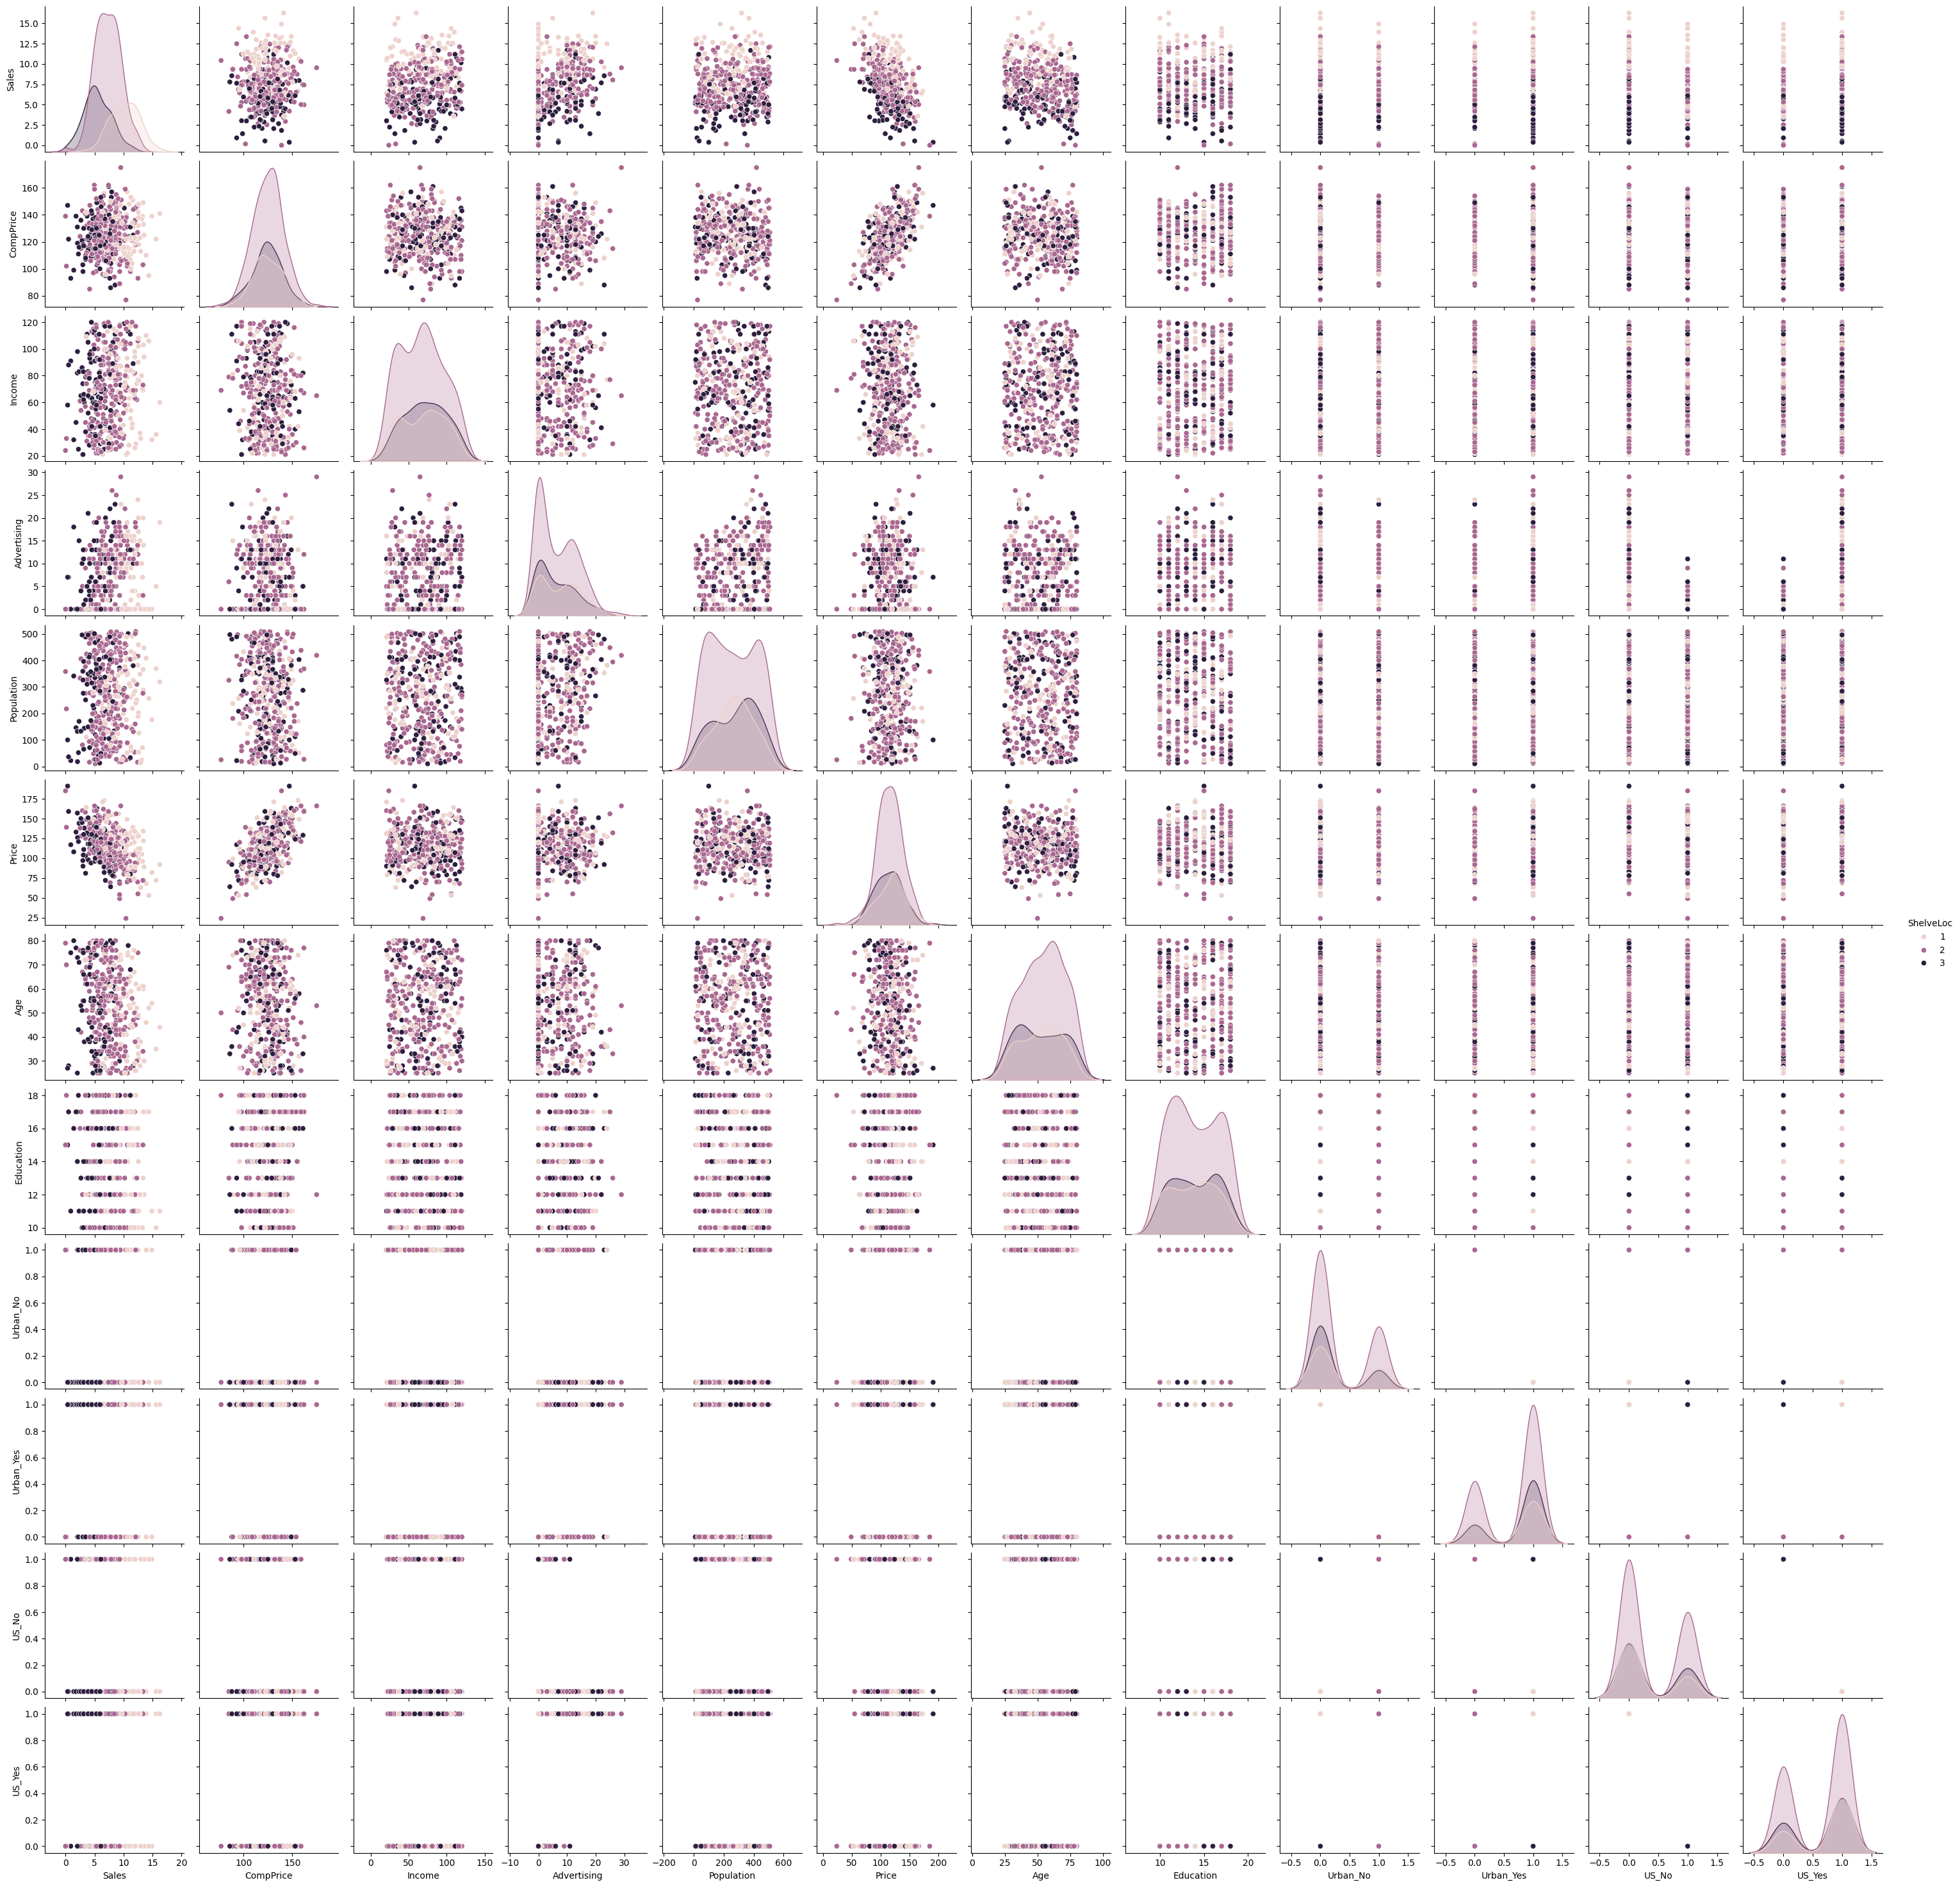

In [9]:
sns.pairplot(data,hue= "ShelveLoc")

In [10]:
data = data.reindex(columns =["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education","Urban_No","Urban_Yes","US_No","US_Yes","ShelveLoc"])

In [11]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc
0,9.50,138,73,11,276,120,42,17,0,1,0,1,3
1,11.22,111,48,16,260,83,65,10,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,0,1,2
3,7.40,117,100,4,466,97,55,14,0,1,0,1,2
4,4.15,141,64,3,340,128,38,13,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1,1
396,6.14,139,23,3,37,120,55,11,1,0,0,1,2
397,7.41,162,26,12,368,159,40,18,0,1,0,1,2
398,5.94,100,79,7,284,95,50,12,0,1,0,1,3


<Axes: >

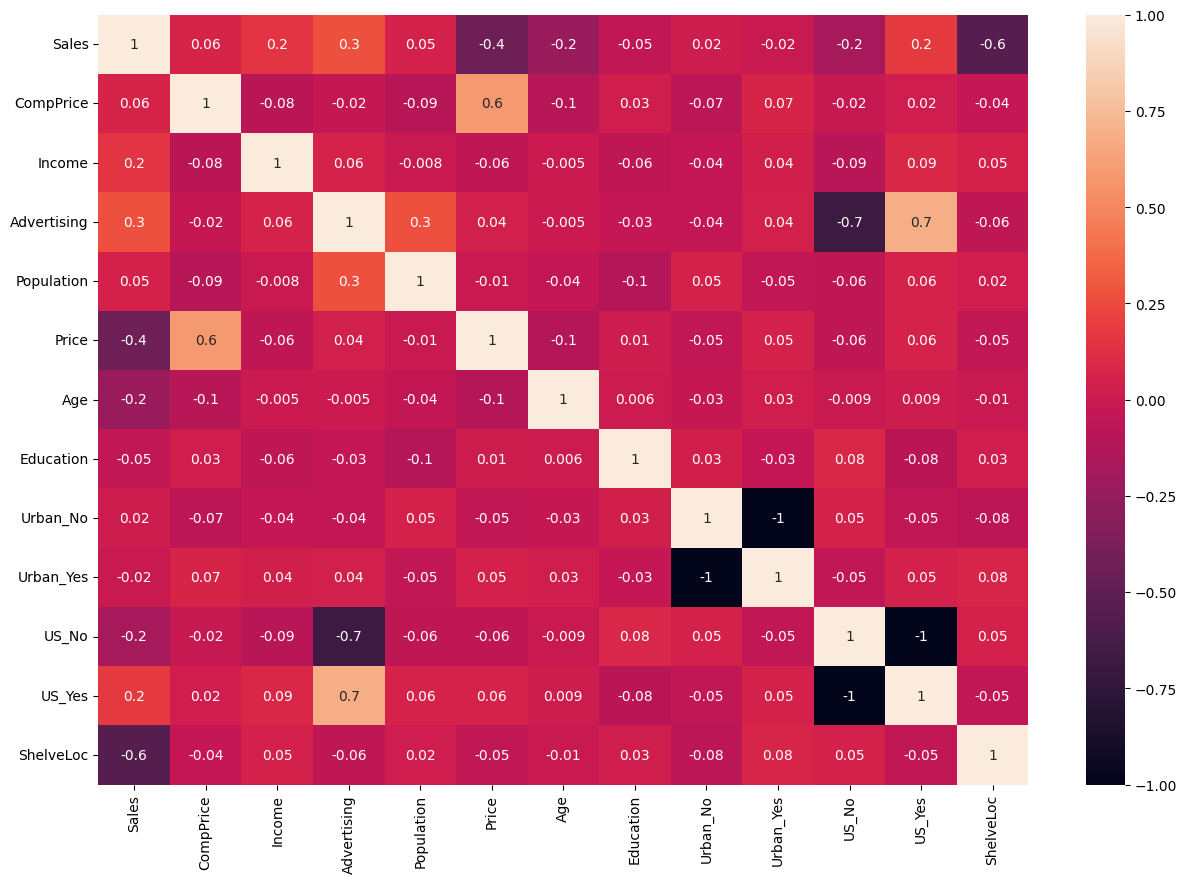

In [12]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g')

In [13]:
x = data.iloc[:,0:12]
y = data.iloc[:,12]

In [14]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,1,0,1
4,4.15,141,64,3,340,128,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1
396,6.14,139,23,3,37,120,55,11,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1


In [15]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [16]:
data["ShelveLoc"].unique()

array([3, 1, 2], dtype=int64)

In [17]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',
       'ShelveLoc'],
      dtype='object')

In [18]:
# splitting data into training a nd testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

# building decision tree classifier  using Entropy

In [19]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth =3)    # C5.0
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [67, 170, 83]'),
 Text(0.25, 0.625, 'x[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [0, 53, 55]'),
 Text(0.125, 0.375, 'x[2] <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(0.375, 0.375, 'x[5] <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [0, 51, 39]'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.75, 0.625, 'x[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [67, 117, 28]'),
 Text(0.625, 0.375, 'x[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [31, 104, 25]'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 33\nvalue = [1, 18, 14]'),
 Text(0.6875, 0.125, 'entropy = 1.178\nsamples = 127\nvalue = [30, 86, 11]'),
 Text(0.875,

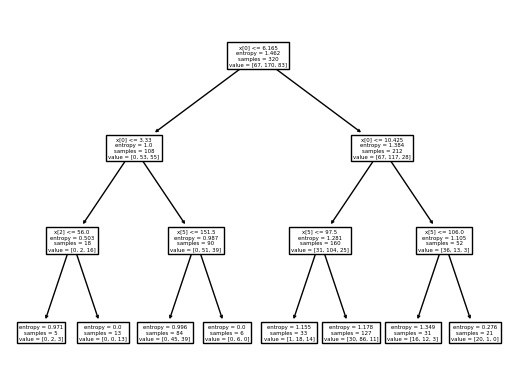

In [20]:
# plot the decision treee
tree.plot_tree(model)

[Text(0.5, 0.875, 'Sales <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [67, 170, 83]\nclass = 2'),
 Text(0.25, 0.625, 'Sales <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [0, 53, 55]\nclass = 3'),
 Text(0.125, 0.375, 'Income <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]\nclass = 3'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]\nclass = 3'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13]\nclass = 3'),
 Text(0.375, 0.375, 'Price <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [0, 51, 39]\nclass = 2'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]\nclass = 2'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = 2'),
 Text(0.75, 0.625, 'Sales <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [67, 117, 28]\nclass = 2'),
 Text(0.625, 0.375, 'Price <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [31, 104, 25]\nclass = 2'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 

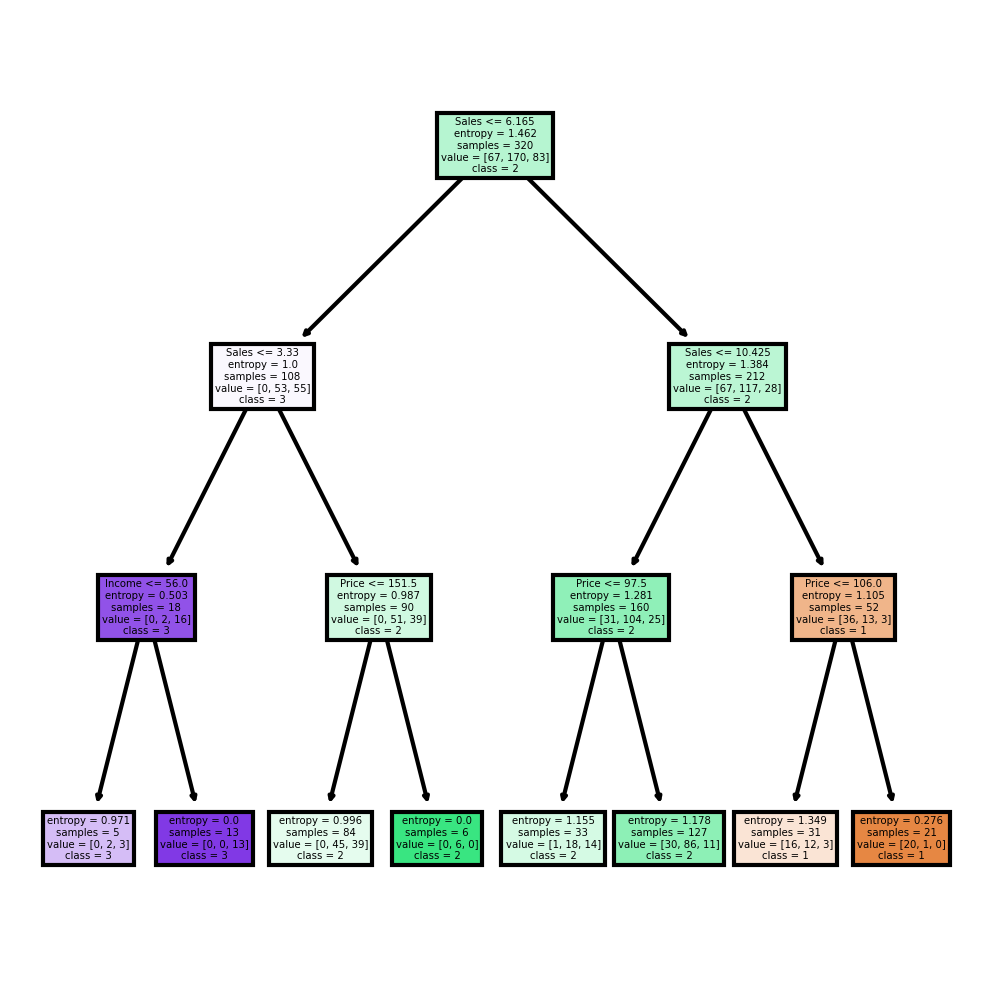

In [21]:
fn = ["Sales",'CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn =  ["1","2","3"]
fig,axes = plt.subplots(nrows=1,ncols= 1,figsize=(4,4),dpi = 300)
tree.plot_tree(model,feature_names =fn,class_names = cn,filled = True)

the tree is spliited up by sales with less than 6.165 and more in the other part. 

In [22]:
# prediction on test data
                            # entropy  = 0 ----pure region

preds = model.predict(x_test)

pd.Series(preds).value_counts()  # getting count of each category


2    63
1    13
3     4
dtype: int64

In [23]:
pd.crosstab(y_test,preds)

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [24]:
# accuracy
np.mean(preds == y_test)

0.625

In [42]:
# building decision tree classifier (CART ) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini= DecisionTreeClassifier(criterion = "gini",max_depth =3)


In [43]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'Sales <= 10.425\ngini = 0.607\nsamples = 320\nvalue = [67, 170, 83]\nclass = 2'),
 Text(0.25, 0.625, 'Sales <= 5.315\ngini = 0.554\nsamples = 268\nvalue = [31, 157, 80]\nclass = 2'),
 Text(0.125, 0.375, 'Sales <= 3.33\ngini = 0.469\nsamples = 72\nvalue = [0, 27, 45]\nclass = 3'),
 Text(0.0625, 0.125, 'gini = 0.198\nsamples = 18\nvalue = [0, 2, 16]\nclass = 3'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 54\nvalue = [0, 25, 29]\nclass = 3'),
 Text(0.375, 0.375, 'Price <= 96.5\ngini = 0.503\nsamples = 196\nvalue = [31, 130, 35]\nclass = 2'),
 Text(0.3125, 0.125, 'gini = 0.531\nsamples = 31\nvalue = [1, 15, 15]\nclass = 2'),
 Text(0.4375, 0.125, 'gini = 0.466\nsamples = 165\nvalue = [30, 115, 20]\nclass = 2'),
 Text(0.75, 0.625, 'Price <= 106.0\ngini = 0.455\nsamples = 52\nvalue = [36, 13, 3]\nclass = 1'),
 Text(0.625, 0.375, 'Sales <= 12.55\ngini = 0.574\nsamples = 31\nvalue = [16, 12, 3]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.583\nsamples = 22\nvalue = [7, 12

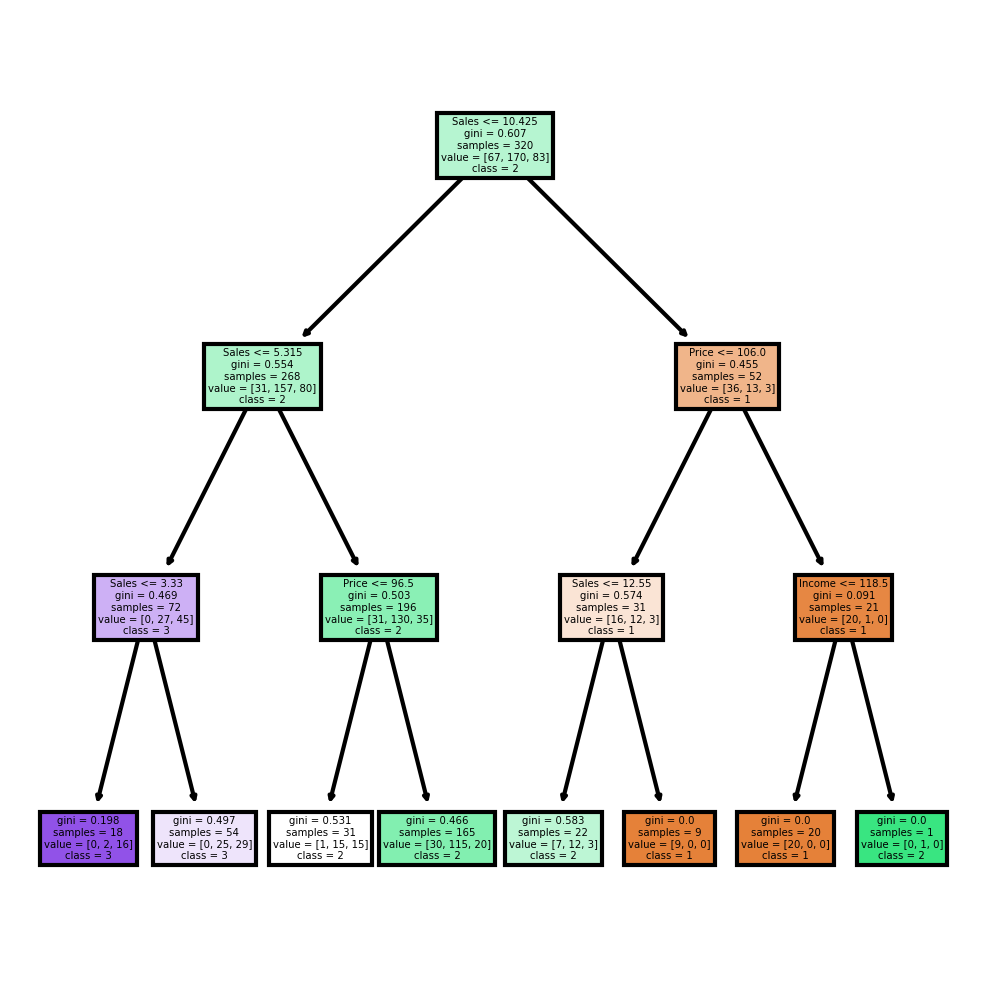

In [44]:
fn = ["Sales",'CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn =  ["1","2","3"]
fig,axes = plt.subplots(nrows=1,ncols= 1,figsize=(4,4),dpi = 300)
tree.plot_tree(model_gini,feature_names =fn,class_names = cn,filled = True)

In [45]:
# prediction ans computing accuracy

preds = model_gini.predict(x_test)
np.mean(preds == y_test)

0.55

In [46]:
seed =7
kfold = KFold(n_splits =10,random_state = seed,shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator =cart,n_estimators =num_trees,random_state =seed)
results = cross_val_score(model,x,y,cv = kfold)
print(results.mean())

C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` 

0.655


In [47]:
model.fit(x_train,y_train)

C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [48]:
# prediction ans computing accuracy

preds = model.predict(x_test)
np.mean(preds == y_test)

0.625

In [80]:
# random Forest classification

from  sklearn.ensemble import RandomForestClassifier
x = data.iloc[:,0:12]
y = data.iloc[:,12]
num_trees = 50
max_features  = 5
kfold = KFold(n_splits =10,random_state=7,shuffle =True)
model = RandomForestClassifier(n_estimators= num_trees,max_features=max_features)
results = cross_val_score(model,x,y,cv = kfold)
print(results.mean())

0.6475


In [83]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=50)

In [84]:
preds = model.predict(x_test)
np.mean(preds == y_test)

0.675

# Random forest has drawn more acuurate results from the far above mentioned methods with accuracy of 67.5%  thn with decision trees